Dispersion Tests
==

After looking at decaying tracers and seeing little effect of allowing 
spring-neap variability, returning here to look at the transient respone
of conservative tracers, in hopes of reconciling the age-tracer results
with the previous conservative tracers.

v02 tries to move some of the common code to tracer_common, but the move 
is incomplete. Probably best to look to single_gaussian.ipynb.


In [1]:
# Quiet some of the logging
# workaround via specifying an invalid value first
%config Application.log_level='WORKAROUND'
# => fails, necessary on Fedora 27, ipython3 6.2.1
%config Application.log_level='INFO'
import logging
logging.getLogger().setLevel(logging.INFO)
log = logging.getLogger()
log.debug('Test debug')
log.info('Test info')
log.warning('Test warn')

ERROR:root:The 'log_level' trait of an IPKernelApp instance must be any of (0, 10, 20, 30, 40, 50, 'DEBUG', 'INFO', 'WARN', 'ERROR', 'CRITICAL'), but a value of 'WORKAROUND' <class 'str'> was specified.
INFO:root:Test info


In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors
from shapely import geometry, wkt
import stompy.plot.cmap as scmap
import xarray as xr
from stompy.grid import unstructured_grid
import numpy as np
import stompy.model.delft.waq_scenario as dwaq
import logging as log
from stompy import utils
from stompy.plot import plot_wkb
import os
import six
from matplotlib import gridspec
%matplotlib inline

In [3]:
cmap=scmap.load_gradient('turbo.cpt') # a less offensive 'jet'

In [4]:
import tracer_common as tc

In [5]:
hydro_orig=dwaq.HydroFiles("/hpcvol1/public/sfb_dfm_v2/wy2013c/DFM_DELWAQ_wy2013c_adj/wy2013c.hyd")
hydro_orig.name='orig'

hydro_agg141=dwaq.HydroFiles("../../agg141/com-wy2013c-agg141.hyd")
hydro_agg141.name='agg141'

hydro_agg141_lp=dwaq.HydroFiles("../../agg141-lp/com-wy2013c-agg141-lp.hyd")
hydro_agg141_lp.name='agg141_lp'

South Bay Blob
==

The choice of hydro is cryptically hidden in the filename at the top of each figure.

`lp` is lowpass, i.e. with tides removed.

`/hpcvol1/public/...` is the original full resolution hydrodynamics.


''

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


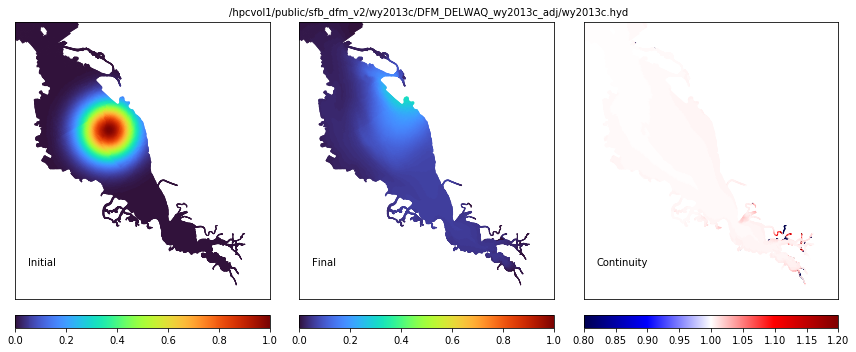

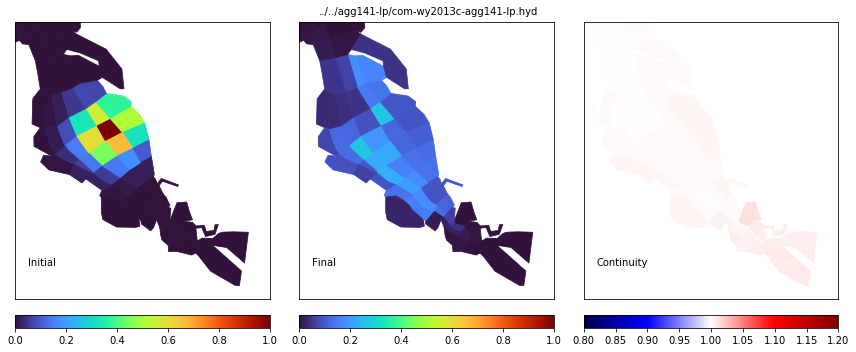

In [7]:
tc.Blobber(hydro=hydro_orig,force=False).complete()
#Blobber(hydro=hydro_agg141).complete()
tc.Blobber(hydro=hydro_agg141_lp,force=False).complete()
;

Lower South Bay Blob
==

''

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


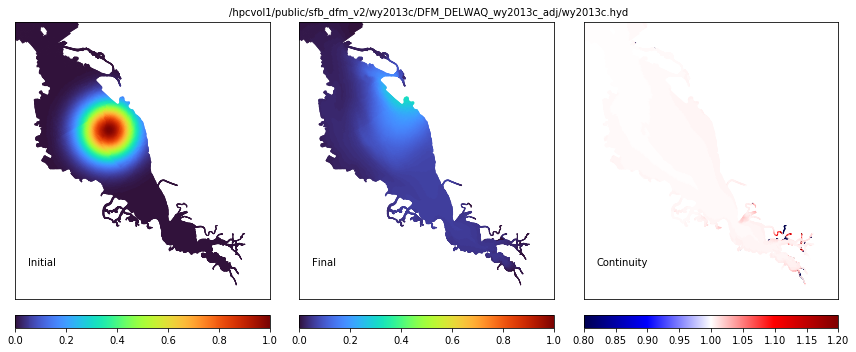

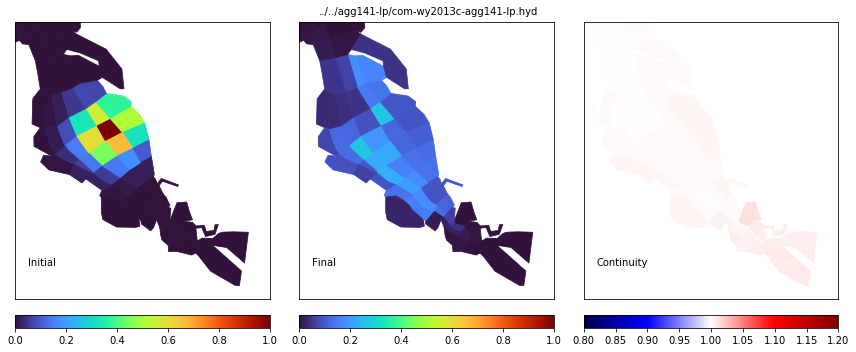

In [8]:
tc.BlobLSB(hydro=hydro_orig).complete()
#BlobLSB(hydro=hydro_agg141).complete()
tc.BlobLSB(hydro=hydro_agg141_lp).complete()
;

Time Series of Tracer within a Region
==

These runs initialize a region to a unit concentration, and follow the evolution
of the average tracer concentration in the region as it is flushed out.



INFO:stompy.model.delft.dfm_grid:Regenerating edges
INFO:stompy.model.delft.dfm_grid:Removing orphaned nodes
INFO:DFMGrid:5121 nodes found to be orphans
INFO:stompy.model.delft.dfm_grid:Removing duplicate nodes
INFO:stompy.model.delft.dfm_grid:Renumbering nodes
INFO:stompy.model.delft.dfm_grid:Extracting grid boundary


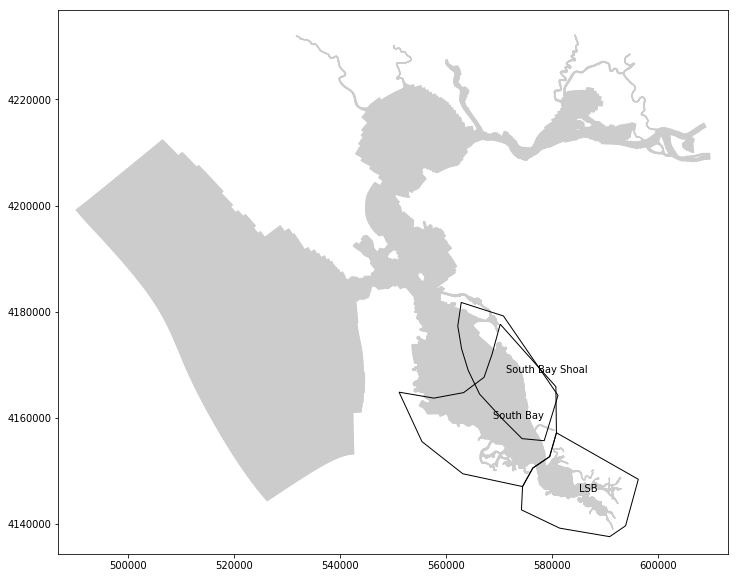

In [6]:
# copied from tally_regions_01.shp
south_bay=wkt.loads("""
Polygon ((570184.11757621716242284 4177639.10577381495386362, 580673.98798651667311788 4165868.02981721935793757, 580779.51211822277400643 4157176.39687086036428809,
                579502.36535809095948935 4152682.20969413500279188, 576316.89153041841927916 4150518.94015444722026587, 574393.47667129873298109 4147040.97573396936058998,
                563137.487071588402614   4149452.58375529991462827, 555436.04330817516893148 4155509.96108419680967927, 551126.1850750622106716  4164827.05031085386872292,
                557692.36349982989486307 4163705.9954578448086977,  563297.63776487542781979 4164746.97496421029791236, 567141.25440376379992813 4167629.68744337651878595,
                568662.68598999048117548 4172033.83150876965373755, 570184.11757621716242284 4177639.10577381495386362))""")

lsb=wkt.loads("""
Polygon ((574393.47667129873298109 4147040.97573396936058998, 576316.89153041841927916 4150518.94015444722026587, 579502.36535809095948935 4152682.20969413500279188, 
                580779.51211822277400643 4157176.39687086036428809, 596208.60523535730317235 4148411.60424893442541361, 593807.15548636857420206 4139647.13588713435456157, 
                590809.89551359775941819 4137600.78393180714920163, 581394.6661063083447516  4139202.93938493076711893, 574187.88490839255973697 4142646.17929060151800513, 
                574393.47667129873298109 4147040.97573396936058998))
""")


southbay_shoal=wkt.loads("""
Polygon ((562839.59208628651686013 4181732.48768383450806141, 570785.53009771392680705 4179192.39274575561285019, 581076.17112890689168125 4164212.34567503165453672, 
          578470.945551389711909   4155680.23190866271033883, 574302.58462736220099032 4156071.01574529008939862, 570785.53009771392680705 4159588.0702749383635819, 
          566291.51597649673931301 4164472.86823278339579701, 564142.20487504510674626 4168966.88235400058329105, 562904.7227257244521752 4173004.98199915187433362, 
          562188.2856919071637094 4177303.60420205537229776, 562839.59208628651686013 4181732.48768383450806141))
""")
#south_bay.union(lsb)

# Show where those regions fall:
fig=plt.figure(figsize=[12,10])
ax=fig.add_subplot(1,1,1)

hydro_orig.grid().plot_cells(color='0.8',ax=ax)
ax.axis('equal')

for poly,name in [ (south_bay,'South Bay'),
                   (lsb,'LSB'),
                   (southbay_shoal,'South Bay Shoal')]:
    plot_wkb.plot_polygon(poly,facecolor='none',ax=ax)
    ax.text(float(poly.centroid.x),
            float(poly.centroid.y),
            name)
    


Tracer distributions
--

More direct quantitative comparisons are below, but this series of plots shows the
spatial distribution of the plumes after 5 days. Unlike the time series
later on, this reveals some finer detail and exposes some artifacts not apparent
when the results are summarized in a time series plot.

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


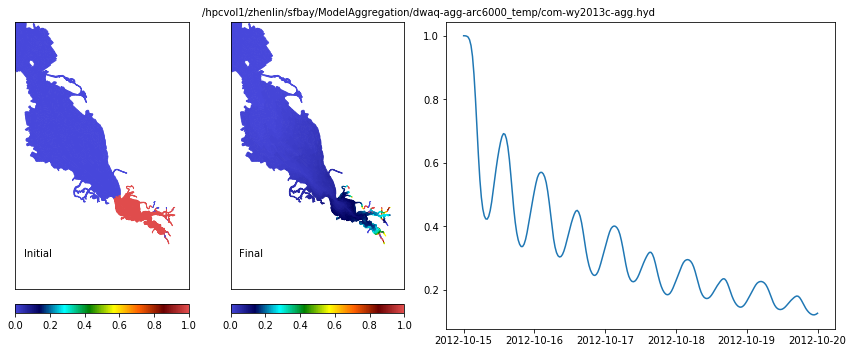

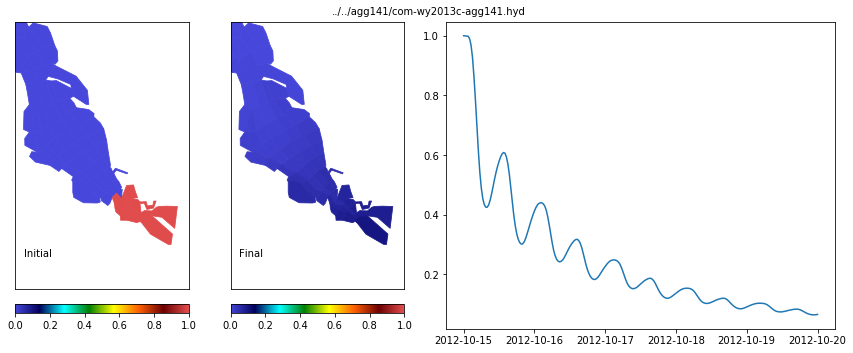

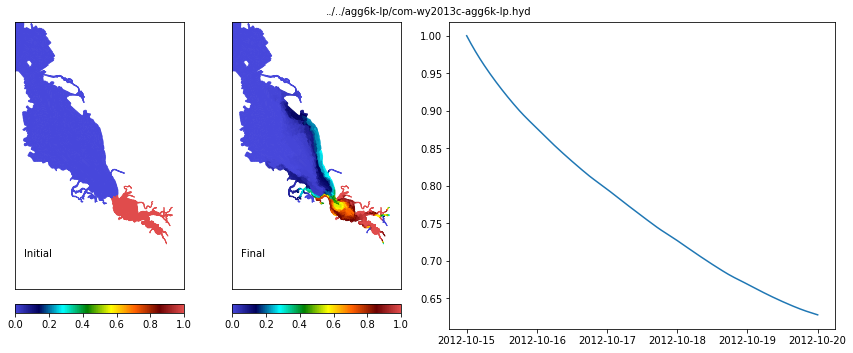

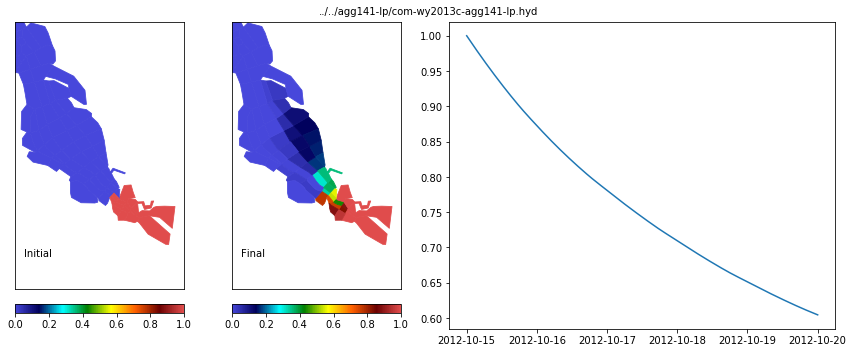

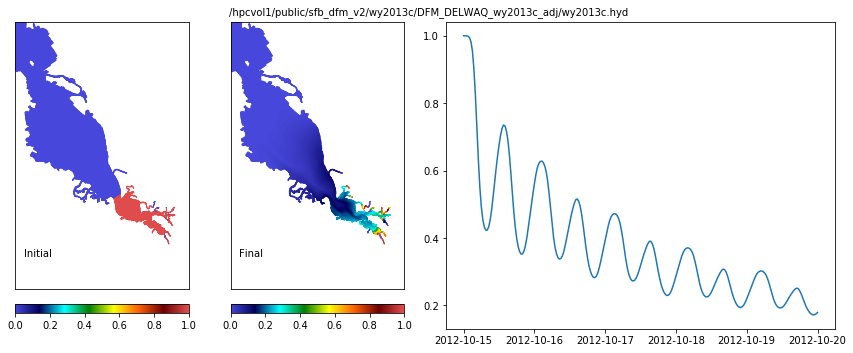

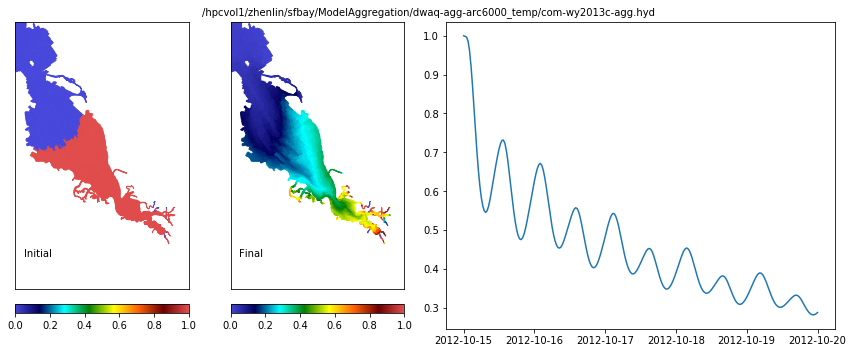

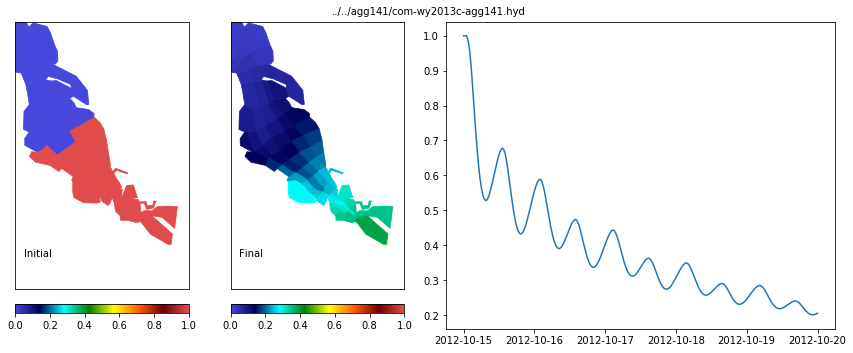

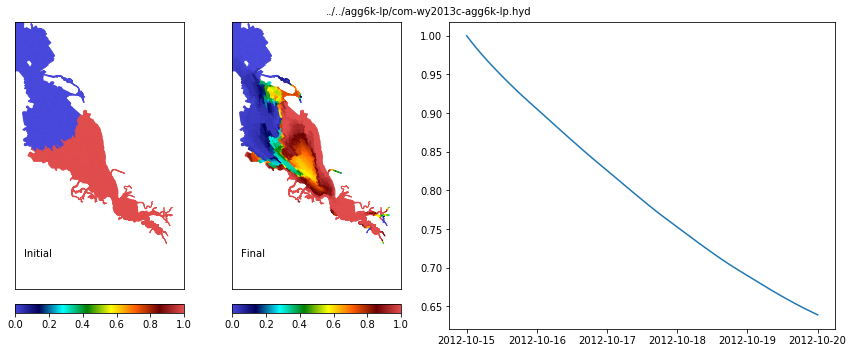

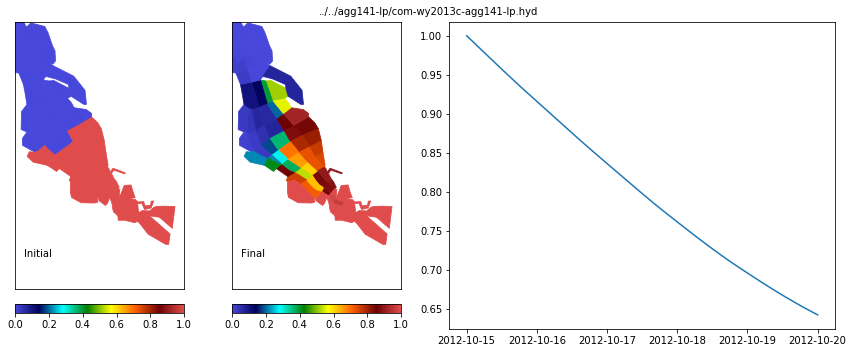

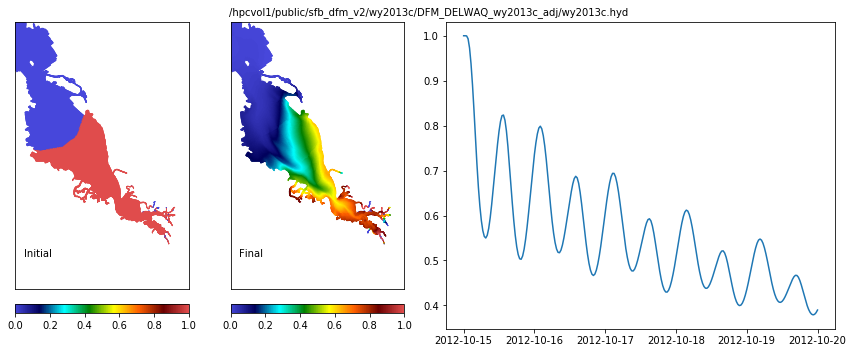

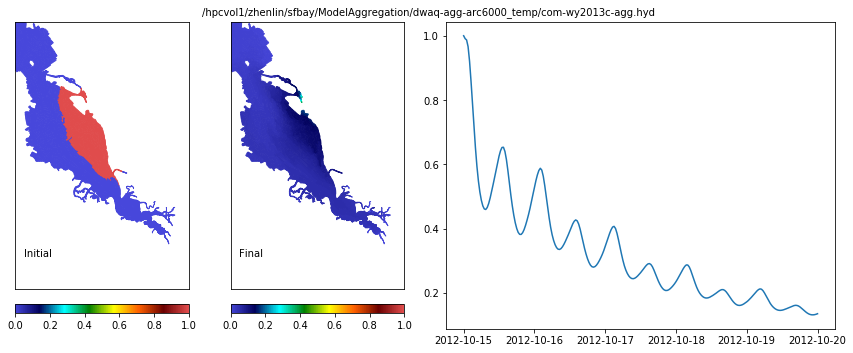

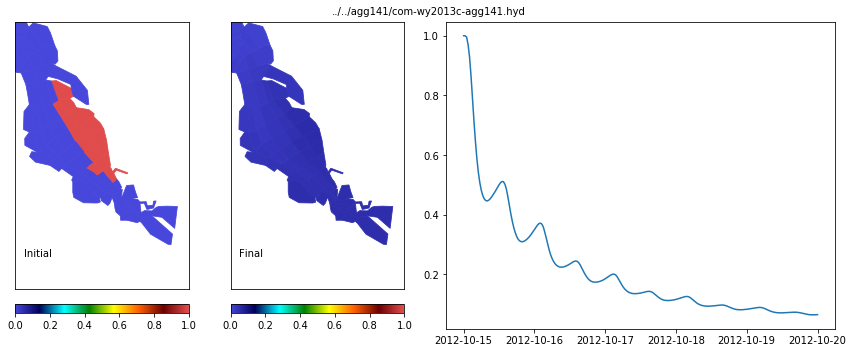

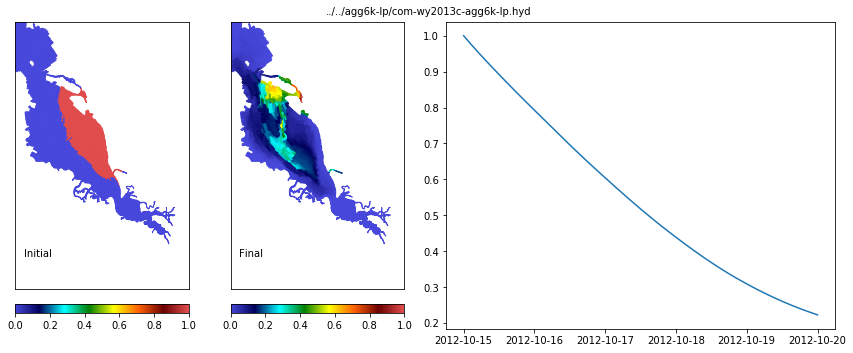

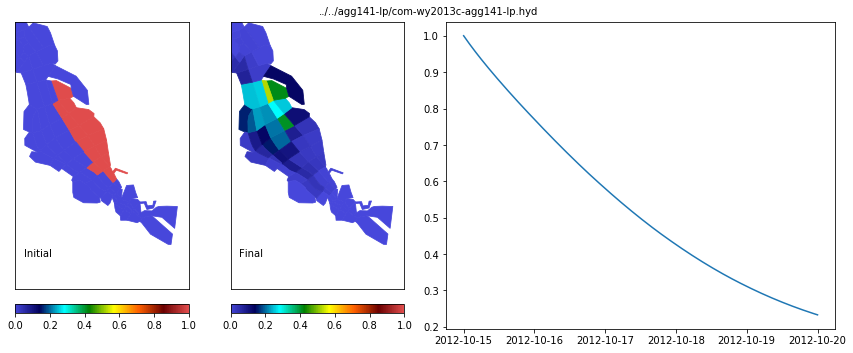

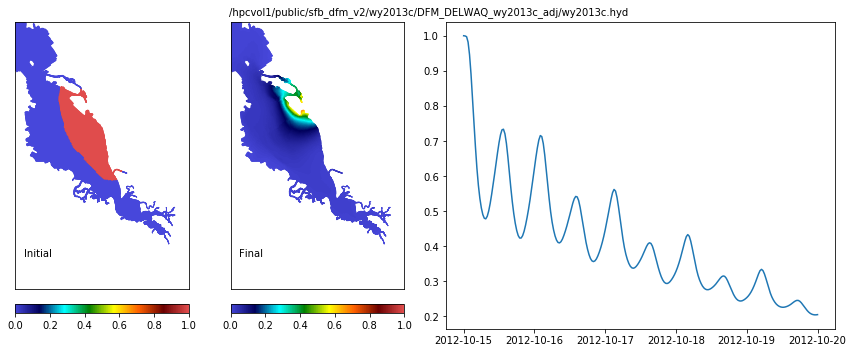

In [12]:
# Example of tracer release
# iterate over different regions, 
# the two base hydro datasets,
# and different global dispersion coefficients

regions=[(lsb,'lsb'),
         (south_bay.union(lsb),'southbay'), # all of South/LSB
         (southbay_shoal,'southbay_shoal')
        ]
# 600 wasn't stable with agg6k_lp.
Kxs=[0]

hydros=[hydro_agg141_lp, hydro_orig]

start_periods=[ (np.timedelta64(75,'D'),'Oct')]


Temporal Variability
--

In order to understand the necessity of time-varying dispersion coefficients,
this section considers two choices of global dispersion coefficient, but for four
different time periods:

 1. dry season, spring
 2. dry season, neap
 3. wet season, spring
 4. wet season, neap

The results suggest that spring-neap variation is important, and seasonal variation is probably
not important.

INFO:noaa_coops:Cached   2012-08-01 00:00:00 -- 2012-09-01 00:00:00
INFO:noaa_coops:Fetching 2012-08-01 00:00:00 -- 2012-09-01 00:00:00
INFO:noaa_coops:Cached   2012-09-01 00:00:00 -- 2012-10-01 00:00:00
INFO:noaa_coops:Cached   2012-10-01 00:00:00 -- 2012-11-01 00:00:00
INFO:noaa_coops:Cached   2012-11-01 00:00:00 -- 2012-12-01 00:00:00
INFO:noaa_coops:Cached   2012-12-01 00:00:00 -- 2013-01-01 00:00:00
INFO:noaa_coops:Cached   2013-01-01 00:00:00 -- 2013-02-01 00:00:00
INFO:noaa_coops:Cached   2013-02-01 00:00:00 -- 2013-03-01 00:00:00
INFO:noaa_coops:Cached   2013-03-01 00:00:00 -- 2013-04-01 00:00:00
INFO:noaa_coops:Cached   2013-04-01 00:00:00 -- 2013-05-01 00:00:00
INFO:noaa_coops:Cached   2013-05-01 00:00:00 -- 2013-06-01 00:00:00
INFO:noaa_coops:Cached   2013-06-01 00:00:00 -- 2013-07-01 00:00:00
INFO:noaa_coops:Cached   2013-07-01 00:00:00 -- 2013-08-01 00:00:00
INFO:noaa_coops:Cached   2013-08-01 00:00:00 -- 2013-09-01 00:00:00
INFO:noaa_coops:Cached   2013-09-01 00:00:00 -- 

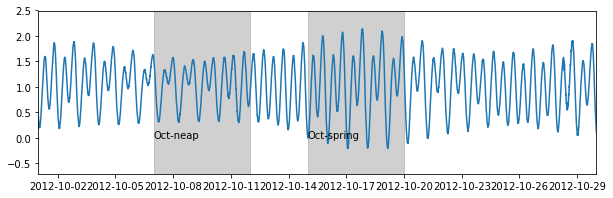

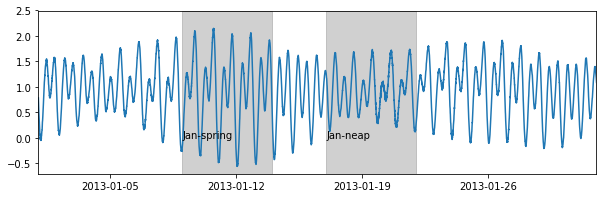

In [8]:
# Choosing periods:
# Grab SF tide data to make the choice
from stompy.io.local import noaa_coops
sf_tides=noaa_coops.coops_dataset_product(station=9414290,start_date=hydro_orig.t_dn[0],end_date=hydro_orig.t_dn[-1],
                                          product='water_level',cache_dir='.')

# these are hand-tuned to fall in reasonable periods based on the tide data
start_periods=[(np.timedelta64(67,'D'),'Oct-neap'),
               (np.timedelta64(75,'D'),'Oct-spring'),
               (np.timedelta64(169,'D'),'Jan-neap'),
               (np.timedelta64(161,'D'),'Jan-spring'),]

for xmin,xmax in [ (np.datetime64("2012-10-01"),np.datetime64("2012-10-30")),  # Dry season
                   (np.datetime64("2013-01-01"),np.datetime64("2013-02-01"))   # Wet season
             ]:
    plt.figure(figsize=[10,3])
    plt.plot(sf_tides.time,sf_tides.water_level.isel(station=0))
    plt.axis(xmin=xmin,xmax=xmax)

    for offset,name in start_periods:
        start=hydro_orig.t_dn[0] + offset/np.timedelta64(1,'D')
        run_duration=5 # days
        plt.axvspan(start,start+run_duration,color='0.4',alpha=0.3) # span doesn't understand dt64
        plt.text(start,0,name,clip_on=True)

INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_20121007
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Inferring 2D elements, 0 / 1410 3-D segments
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3a5f6e4358>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3a5f6e4940>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 160 monitored segments for region
INFO:WaqModel:Writing hydro data
INFO:HydroFiles:Using .bnd file, not writing out kludgey boundary-links.csv
INFO:HydroFiles:Writing hyd file
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFi

There are now 2 monitor areas


INFO:InpFile:No dispersion arrays, will skip assignment to substances
INFO:InpFile:No velocity arrays, will skip assignment to substances
INFO:HydroFiles:Slowly setting boundary info
INFO:HydroFiles:Done setting boundary info
INFO:WaqModel:Running delwaq1:
INFO:WaqModel:  /opt/anaconda3/bin/delwaq1 -waq  -p /home/alliek/software/Delft3D-FM/64634/share/delft3d/proc_def
INFO:WaqModel:delwaq1 ran in 0.45s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.95s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_Kx150_20121007
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment d

There are now 2 monitor areas


INFO:WaqModel:Running delwaq1:
INFO:WaqModel:  /opt/anaconda3/bin/delwaq1 -waq  -p /home/alliek/software/Delft3D-FM/64634/share/delft3d/proc_def
INFO:WaqModel:delwaq1 ran in 0.21s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.72s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3a5f617e10>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object 

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.26s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.75s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_Kx150
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3a5f63a5c0>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3a5f620f60>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 160 monitored segments for region
INFO

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.19s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.82s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_20130117
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3a5f4ec048>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3a5f619f28>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 160 monitored segments for region
INFO:WaqModel:Writing hydro data
INFO:HydroFiles:Using .bn

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.18s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:Waiting for run_agg141_lp_gaussian_20130117/waqmodel.mon to be created
INFO:WaqModel:Okay - run_agg141_lp_gaussian_20130117/waqmodel.mon exists now
INFO:WaqModel:0.00% Completed
INFO:WaqModel:20.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:29 2020) 847069.09x realtime
INFO:WaqModel:40.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:29 2020) 633174.85x realtime
INFO:WaqModel:60.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:29 2020) 668559.53x realtime
INFO:WaqModel:80.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:29 2020) 703160.26x realtime
INFO:WaqModel:delwaq2 ran in 3.10s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_K

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.18s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:Waiting for run_agg141_lp_gaussian_Kx150_Kx150_20130117/waqmodel.mon to be created
INFO:WaqModel:Okay - run_agg141_lp_gaussian_Kx150_Kx150_20130117/waqmodel.mon exists now
INFO:WaqModel:0.00% Completed
INFO:WaqModel:20.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:33 2020) 427204.78x realtime
INFO:WaqModel:40.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:33 2020) 545073.50x realtime
INFO:WaqModel:60.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:33 2020) 626807.66x realtime
INFO:WaqModel:80.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:33 2020) 681870.66x realtime
INFO:WaqModel:delwaq2 ran in 3.04s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_ag

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.18s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:Waiting for run_agg141_lp_gaussian_20130109/waqmodel.mon to be created
INFO:WaqModel:Okay - run_agg141_lp_gaussian_20130109/waqmodel.mon exists now
INFO:WaqModel:0.00% Completed
INFO:WaqModel:20.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:36 2020) 847365.45x realtime
INFO:WaqModel:40.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:36 2020) 837743.77x realtime
INFO:WaqModel:60.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:36 2020) 834641.49x realtime
INFO:WaqModel:80.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:36 2020) 833223.23x realtime
INFO:WaqModel:delwaq2 ran in 2.84s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_K

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.18s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:Waiting for run_agg141_lp_gaussian_Kx150_Kx150_20130109/waqmodel.mon to be created
INFO:WaqModel:Okay - run_agg141_lp_gaussian_Kx150_Kx150_20130109/waqmodel.mon exists now
INFO:WaqModel:0.00% Completed
INFO:WaqModel:20.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:39 2020) 847383.06x realtime
INFO:WaqModel:40.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:39 2020) 836603.94x realtime
INFO:WaqModel:60.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:39 2020) 1059181.95x realtime
INFO:WaqModel:80.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:51:39 2020) 1111964.52x realtime
INFO:WaqModel:delwaq2 ran in 2.64s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.19s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.57s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_Kx150_20121007
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac09b5ac8>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac09b5b38>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 450 monitored segments for re

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.19s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.54s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac09c2048>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac09bd518>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 450 monitored segments for region
INFO:WaqModel:Wr

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.19s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.54s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_Kx150
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac09bd588>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac09bdc88>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 450 monitored segments for region
INFO

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.18s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.65s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_20130117
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac09c2f60>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac09c94a8>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 450 monitored segments for region
INFO:Wa

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.18s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 2.74s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_Kx150_20130117
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac09c9cf8>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac09c9be0>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 450 monitored segments for re

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.18s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 2.64s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_20130109
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac09d7470>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac09d73c8>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 450 monitored segments for region
INFO:Wa

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.19s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 2.65s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_Kx150_20130109
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac09c9ef0>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac09c1748>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 450 monitored segments for re

There are now 2 monitor areas


INFO:WaqModel:delwaq2 ran in 2.68s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_20121007
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac08da400>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac08da3c8>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 170 monitored segments for region
INFO:WaqModel:Writing hydro data
INFO:HydroFiles:Using .bnd file, not writing out kludgey boundary-links.csv
INFO:HydroFiles:Writing hyd file
INFO:H

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.18s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.74s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_Kx150_20121007
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac08da6d8>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac08da898>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 170 monitored segments for re

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.19s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.94s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac08e8748>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac08e8518>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 170 monitored segments for region
INFO:WaqModel:Wr

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.20s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.54s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_Kx150
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac08daeb8>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac09444e0>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 170 monitored segments for region
INFO

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.19s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 1.63s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_20130117
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac0918400>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac0900828>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 170 monitored segments for region
INFO:Wa

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.18s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 2.74s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_Kx150_20130117
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac08e8668>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac0902550>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 170 monitored segments for re

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.19s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 2.94s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_20130109
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac0902e80>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac09007b8>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 170 monitored segments for region
INFO:Wa

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.17s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 2.84s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:Processing agg141_lp
INFO:root:base_path defaults to run_agg141_lp_gaussian_Kx150_Kx150_20130109
INFO:root:Run seems to exist -- will not run again
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3ac096fc18>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3ac0967400>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 170 monitored segments for re

There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.18s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:delwaq2 ran in 2.65s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()


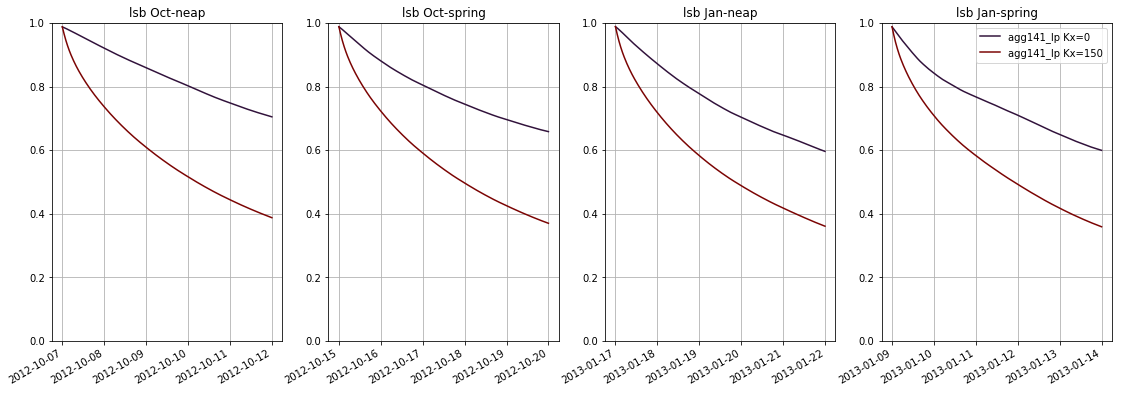

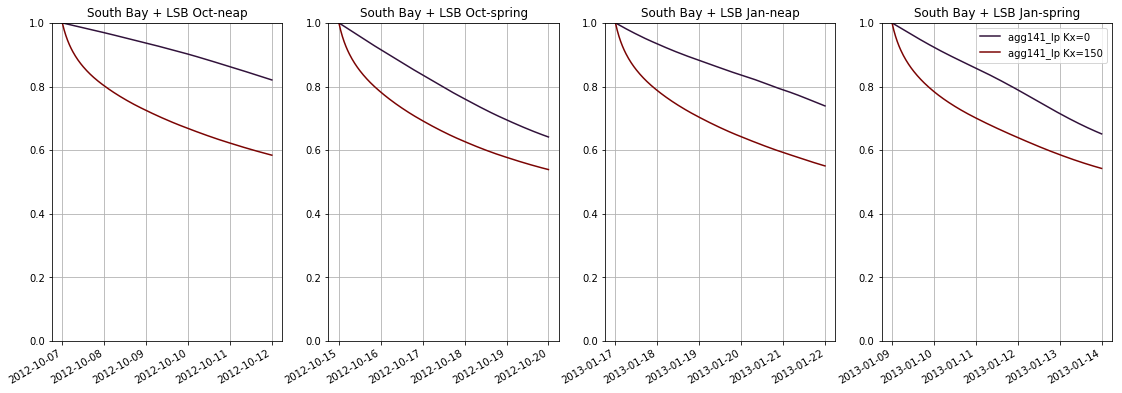

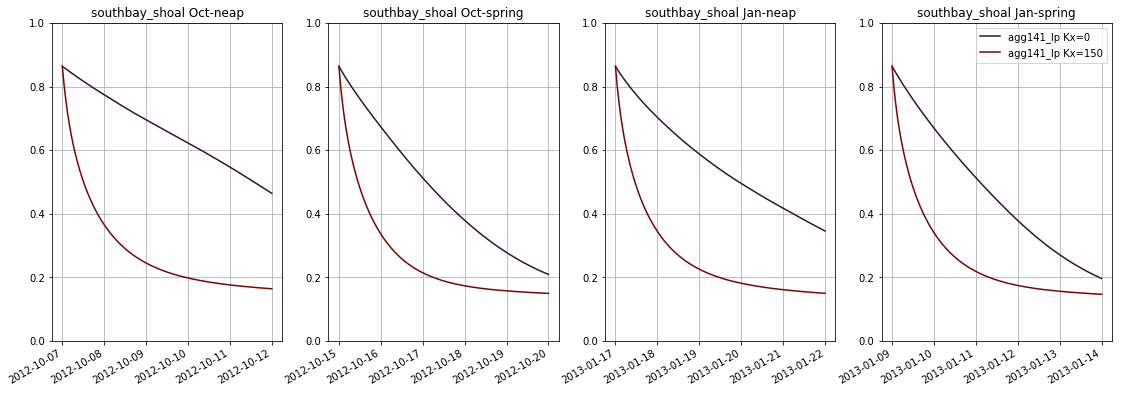

In [9]:
# iterate over different regions, 
# the two base hydro datasets,
# and different global dispersion coefficients

regions=[(lsb,'lsb'),
         (south_bay.union(lsb),'southbay'), # all of South/LSB
         (southbay_shoal,'southbay_shoal')
        ]
Kxs=[0, 150]


hydros=[hydro_agg141_lp] # , hydro_orig]

# start periods set above

for region,blob_name in regions:
    # One figure with an axes per time period
    fig,axs=plt.subplots(1,len(start_periods),figsize=[19,6.5])

    for ax,(start_offset,start_name) in zip(axs,start_periods):
        results=[]
        styles=[]

        for Kxi,Kx in enumerate(Kxs):
            color=cmap(float(Kxi)/(len(Kxs)-1.))

            ls=['-','--','-.',':']
            for hydro in hydros:
                if Kx>0 and "orig" in hydro.name:
                    continue # don't bother adding dispersion to original
                log.info("Processing %s"%hydro.name)
                res=tc.ResidenceTime(hydro=hydro,base_x_dispersion=Kx,region=region,blob_name=blob_name,
                                     start_offset=start_offset)
                res.run_waq_model()
                if not len(res.wm.monitor_areas)>1:
                    res.force=True
                    log.warning("Hmm - monitor region did not get set -- force re-run")
                    res.run_waq_model()
                    assert len(res.wm.monitor_areas)>1
                results.append(res)
                if 'orig' in hydro.name:
                    styles.append( dict(color='0.5',lw=3) )
                else:
                    styles.append( dict(color=color,ls=ls[0]) )
                ls.append(ls.pop(0)) # rotate

        for res,style in zip(results,styles):
            hist_ds=res.wm.hist_ds()
            ax.plot(hist_ds.time,hist_ds.bal.sel(region='region',field='dye1'),
                    label=res.hydro.name+" Kx=%g"%res.base_x_dispersion,**style)
        if ax==axs[-1]:
            ax.legend()
        if blob_name=='southbay':
            title="South Bay + LSB"
        else:
            title=blob_name
        title+= " " + start_name
        ax.set_title(title) 
        ax.axis(ymax=1,ymin=0.)
        ax.grid(1)
    fig.autofmt_xdate()

INFO:root:base_path defaults to run_agg141_lp_gaussian_50-50--50


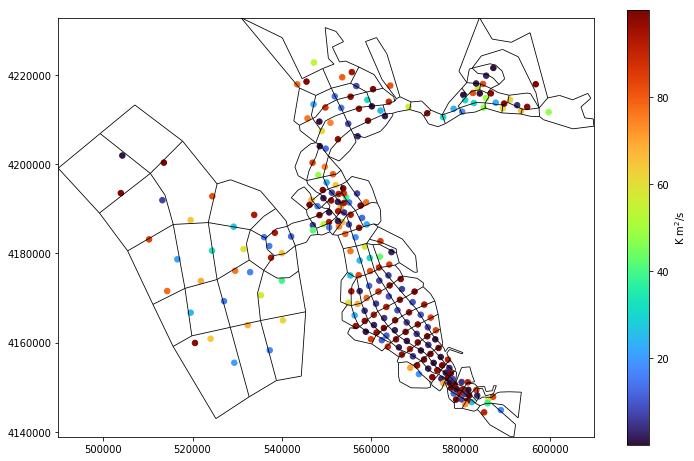

In [11]:
# Configuration for anisotropic dispersion

class ResidenceTimeKxy(tc.ResidenceTime):
    """
    Extra code for specifying anisotropic dispersion. this could be moved
    to a mix-in class, or even part of Blobber. 
    """
    Kxy=(0,0,0) # Kxx, Kyy, Kxy
    def calc_base_path(self):
        base_path=super(ResidenceTimeKxy,self).calc_base_path()
        if self.Kxy!=(0,0,0):
            base_path+="_%g-%g-%g"%(self.Kxy[0],self.Kxy[1],self.Kxy[2])
        return base_path

    def setup_model(self):
        super(ResidenceTimeKxy,self).setup_model()
        Kexch=self.disp_array()
        self.wm.dispersions['anisoK']=dwaq.DispArray(substances=".*",data=Kexch)
    def disp_array(self):
        self.hydro.infer_2d_elements()
        self.hydro.infer_2d_links()
        
        K=np.zeros(self.hydro.n_exch,np.float64)

        # use centroids to get edge normals. 
        g_cc=self.hydro.grid().cells_centroid()
        link_vec=np.zeros((len(self.hydro.links),2),np.float64)
        int_links=np.all(self.hydro.links>=0,axis=1) # interior links

        link_vec[int_links,:] = utils.to_unit( g_cc[ self.hydro.links[int_links,1]] - g_cc[ self.hydro.links[int_links,0]] )
        # project tensor onto edge normal
        link_K=self.Kxy[0]*link_vec[:,0]**2 + self.Kxy[1]*link_vec[:,1]**2 + 2*self.Kxy[2]*link_vec[:,0]*link_vec[:,1]
        K[:self.hydro.n_exch_x]=link_K[self.hydro.exch_to_2d_link['link']]
        return K
    def plot_dispersion(self):
        Kexch=self.disp_array()
        # map that back to links
        link_K=[ Kexch[exchs[0]] for link,exchs in utils.enumerate_groups(self.hydro.exch_to_2d_link['link'])]
        link_K=np.array(link_K)
        g_cc=self.hydro.grid().cells_centroid()
        link_ctr=np.zeros((len(self.hydro.links),2),np.float64)
        int_links=np.all(self.hydro.links>=0,axis=1) # interior links
        link_ctr[int_links,:] = 0.5*(g_cc[ self.hydro.links[int_links,1]] + g_cc[ self.hydro.links[int_links,0]] )
        plt.figure(figsize=(12,8))
        self.hydro.grid().plot_edges(color='k')
        scat=plt.scatter(link_ctr[int_links,0],
                         link_ctr[int_links,1],
                         30,
                         link_K[int_links],cmap=cmap)
        plt.colorbar(scat,label="K m$^2$/s") 

res=ResidenceTimeKxy(hydro=hydro_agg141_lp,Kxy=[50,50,-50])
res.plot_dispersion()

Scaling Dispersion from Tidal--Nontidal Difference
--

As a halfway point between (a) a direct calculation of what the dispersion 
coefficient "should" be, and (b) prescribing anisotropic dispersion coefficients
through blind optimization, there is a middle ground of correlating
dispersion with features of the hydrodynamics. This section looks at
the feasibility of using the difference between the tidal and non-tidal
advective fluxes as a predictor of dispersion coefficient.

The scaling here is important. Fluxes are m$^3$/s, and dispersion coefficients
are m$^2$/s.

As a thought experiment, consider a case where each tidal cycle
leads to a net exchange of 10% of the volume between two control
volumes of equal size. In a subtidal representation of this system,
that flux is the product of the difference in concentrations, the
area of their common face, and divided by the length between them.

If we assume that the dispersive flux should scale with the rms
tidal flux, then to get the corresponding dispersion coefficient we
scale rms flux by length/area.

Overall, the approach is promising, and with tuning a single
parameter it comes close to performing as well as the Kxy approach
which required 2-3 parameters (and even then, the parameters are
specific to the 3 test regions).

In [ ]:
hydro_tidal=hydro_agg141
hydro_subtidal=hydro_agg141_lp
hydros=[hydro_tidal,hydro_subtidal]


class ResidenceTimeKauto(ResidenceTimeKxy): 
    # choose some period over which to look at the stats
    ti_start=2000
    ti_stop =2200
    hydro_tidal=None # set this to a tidal version of self.hydro
    K_scale=0.02 # non-dimensional scaling from Qexch*L/A => dispersion coefficient.
    
    def calc_base_path(self):
        base_path=super(ResidenceTimeKauto,self).calc_base_path()
        base_path+="_Kauto"
        return base_path

    def disp_array(self):
        self.hydro.infer_2d_elements()
        self.hydro.infer_2d_links()
        
        K=np.zeros(self.hydro.n_exch,np.float64)

        Qaccum=np.zeros(self.hydro.n_2d_links,np.float64)
        Aaccum=np.zeros(self.hydro.n_2d_links,np.float64)
        accum_count=0

        for ti in range(self.ti_start,self.ti_stop):
            t_sec=hydro.t_secs[ti]
            flows=[ hydro.flows(t_sec) for hydro in [self.hydro_tidal,self.hydro]]
            flow_hp=flows[0] - flows[1]
            # depth-integrate
            flow_hor=flow_hp[:hydro_tidal.n_exch_x]
            link_flows=np.bincount( self.hydro.exch_to_2d_link['link'],
                                    self.hydro.exch_to_2d_link['sgn']*flow_hor)
            
            Qaccum+=link_flows**2
            Aaccum+=np.bincount( self.hydro.exch_to_2d_link['link'],self.hydro.areas(t_sec)[:self.hydro.n_exch_x])
            accum_count+=1
        rms_flows=np.sqrt(Qaccum/accum_count)
        mean_A=Aaccum/accum_count
        
        Lexch=self.hydro.exchange_lengths.sum(axis=1)[:self.hydro.n_exch_x]
        L=[Lexch[exchs[0]] for l,exchs in utils.enumerate_groups(self.hydro.exch_to_2d_link['link'])]
        
        # This is just a placeholder. A proper scaling needs to account for 
        # cell size. rms_flows has units of m3/s. probably that should be normalized
        # by dividing by average flux area, and possibly multiplying by the distance
        # between cell centers. that doesn't seem quite right.
        link_K=self.K_scale*rms_flows*L/mean_A
        K[:self.hydro.n_exch_x]=link_K[self.hydro.exch_to_2d_link['link']]
        
        return K

res=ResidenceTimeKauto(hydro=hydro_agg141_lp,hydro_tidal=hydro_agg141)
res.plot_dispersion()
plt.gca().collections[1].set_norm(colors.LogNorm(vmin=1))

In [14]:
def Krot(Kmaj,Kmin,theta_deg):
    """
    Rotated dispersion tensor. 
    Kmaj: dispersion along the major axis
    Kmin: dispersion along minor axis.
    assumes that the inputs are axis-aligned, so the cross-term is 0.
    theta_deg: rotation in degrees CCW, starting from Kmaj=Kxx.
    """
    theta=theta_deg*np.pi/180.
    Kxx=Kmaj*np.cos(theta)**2+Kmin*np.sin(theta)**2
    Kyy=Kmaj*np.sin(theta)**2+Kmin*np.cos(theta)**2
    Kxy=(Kmaj-Kmin)*np.cos(theta)*np.sin(theta)
    return (Kxx,Kyy,Kxy)


INFO:root:base_path defaults to run_agg141_lp_gaussian_26.7909-123.209--57.4533_20130109
INFO:root:base_path defaults to run_agg141_lp_gaussian_20130109
INFO:root:base_path defaults to run_agg141_lp_gaussian_150-150-0_20130109
INFO:WaqModel: start time updated from hydro: 2012-08-01T00:00:00.000000
INFO:WaqModel: stop time update from hydro: 2013-10-01T00:00:00.000000
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:WaqModel:Parameters gleaned from hydro: NamedObjects([('surf', <stompy.model.delft.waq_scenario.ParameterSpatial object at 0x7f3abf0ad6a0>), ('vertdisper', <stompy.model.delft.waq_scenario.ParameterSpatioTemporal object at 0x7f3a5f720e10>)])
INFO:WaqModel:Selecting elements in polygon 'region'
INFO:WaqModel:Added 160 monitored segments for region
INFO:WaqModel:Writing hydro data
INFO:HydroFiles:Using .bnd file, not writing out kludgey boundary-links.csv
INFO:HydroFiles:Writing hyd file
INFO:HydroFiles:Bottom depths will be i

Res: base_path: run_agg141_lp_gaussian_26.7909-123.209--57.4533_20130109
There are now 2 monitor areas


INFO:WaqModel:Running delwaq1:
INFO:WaqModel:  /opt/anaconda3/bin/delwaq1 -waq  -p /home/alliek/software/Delft3D-FM/64634/share/delft3d/proc_def
INFO:WaqModel:delwaq1 ran in 0.20s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:Waiting for run_agg141_lp_gaussian_26.7909-123.209--57.4533_20130109/waqmodel.mon to be created
INFO:WaqModel:Okay - run_agg141_lp_gaussian_26.7909-123.209--57.4533_20130109/waqmodel.mon exists now
INFO:WaqModel:0.00% Completed
INFO:WaqModel:20.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:56:24 2020) 847253.77x realtime
INFO:WaqModel:40.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:56:24 2020) 542781.47x realtime
INFO:WaqModel:60.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:56:24 2020) 589114.64x realtime
INFO:WaqModel:80.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:56:24 2020) 634599.13x realtime
INFO:WaqMode

Res: base_path: run_agg141_lp_gaussian_20130109
Res: base_path: run_agg141_lp_gaussian_150-150-0_20130109
There are now 2 monitor areas


INFO:WaqModel:delwaq1 ran in 0.20s
INFO:WaqModel:Running delwaq2 - might take a while...
INFO:WaqModel:  /opt/anaconda3/bin/delwaq2 waqmodel
INFO:WaqModel:Waiting for run_agg141_lp_gaussian_150-150-0_20130109/waqmodel.mon to be created
INFO:WaqModel:Okay - run_agg141_lp_gaussian_150-150-0_20130109/waqmodel.mon exists now
INFO:WaqModel:0.00% Completed
INFO:WaqModel:20.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:56:27 2020) 846734.67x realtime
INFO:WaqModel:40.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:56:27 2020) 835080.40x realtime
INFO:WaqModel:60.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:56:27 2020) 832873.62x realtime
INFO:WaqModel:80.00% Completed
INFO:WaqModel:Time remaining: 0.000h (Thu May 28 11:56:27 2020) 832738.63x realtime
INFO:WaqModel:delwaq2 ran in 3.04s
INFO:WaqModel:Done
INFO:WaqModel:NEFIS file didn't exist. Skipping ugrid_nef()
INFO:root:base_path defaults to run_agg141_lp_gaussian_26.7909-123.209--5

Res: base_path: run_agg141_lp_gaussian_26.7909-123.209--57.4533_20130109
Res: base_path: run_agg141_lp_gaussian_20130109
Res: base_path: run_agg141_lp_gaussian_150-150-0_20130109
Res: base_path: run_agg141_lp_gaussian_26.7909-123.209--57.4533_20130109
Res: base_path: run_agg141_lp_gaussian_20130109
Res: base_path: run_agg141_lp_gaussian_150-150-0_20130109


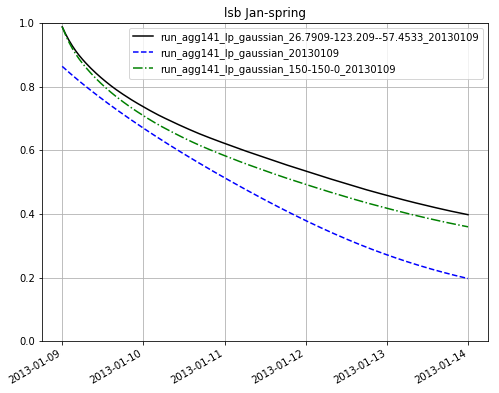

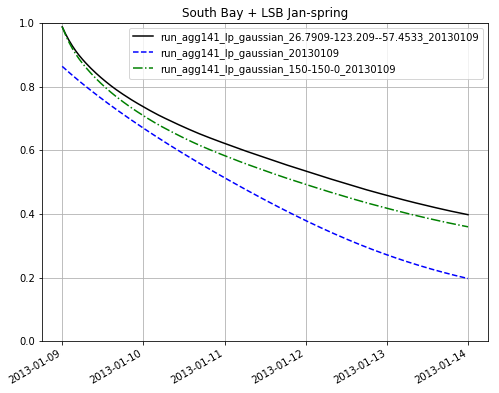

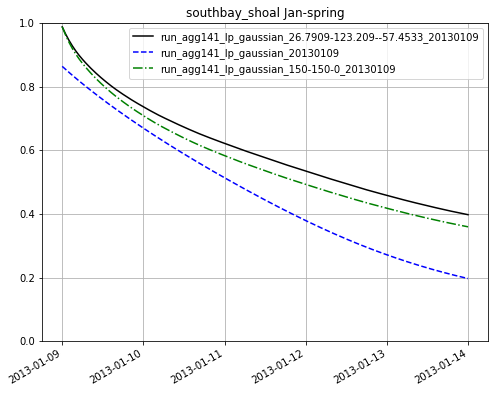

In [15]:
duration=np.timedelta64(5,'D')

for region,blob_name in regions:
    fig,ax=plt.subplots(1,1,figsize=[8,6.5])
    
    results=[]
    styles=[]

    colors=['k','b','g','orange','r']
    ls=['-','--','-.',':']
    for res in [
        #ResidenceTimeKxy(hydro=hydro_orig,region=region,blob_name=blob_name,
        #                 start_offset=start_offset,duration=duration),
        #ResidenceTimeKauto(hydro=hydro_agg141_lp,region=region,blob_name=blob_name,
        #                   hydro_tidal=hydro_agg141,force=False,K_scale=0.2,
        #                   start_offset=start_offset,duration=duration),
        ResidenceTimeKxy(hydro=hydro_agg141_lp,region=region,blob_name=blob_name,
                         Kxy=Krot(150,0,115),start_offset=start_offset,duration=duration),
        ResidenceTimeKxy(hydro=hydro_agg141_lp,region=region,blob_name=blob_name,
                         Kxy=(0,0,0),start_offset=start_offset,duration=duration),
        ResidenceTimeKxy(hydro=hydro_agg141_lp,region=region,blob_name=blob_name,
                         Kxy=Krot(150,150,0),start_offset=start_offset,duration=duration),
        
    ]:        
        print("Res: base_path: %s"%(res.base_path))
        res.run_waq_model()
        results.append(res)
        color=colors[0]
        if 'orig' in hydro.name:
            styles.append( dict(color='0.5',lw=3) )
        else:
            styles.append( dict(color=color,ls=ls[0]) )
        ls.append(ls.pop(0)) # rotate
        colors.append(colors.pop(0))

    for res,style in zip(results,styles):
        hist_ds=res.wm.hist_ds()
        hist_ds.load()
        ax.plot(hist_ds.time,hist_ds.bal.sel(region='region',field='dye1'),
                label=res.base_path,**style)
        hist_ds.close()
    ax.legend()
    if blob_name=='southbay':
        title="South Bay + LSB"
    else:
        title=blob_name
    title+= " " + start_name
    ax.set_title(title) 
    ax.axis(ymax=1,ymin=0.)
    ax.grid(1)
    fig.autofmt_xdate()

Continuous Release
==

Unlike the tests above, here the tracer source is a point with a continuous
mass-per-time discharge. So far it runs, but no analysis yet. One avenue
for analysis is to run release for 15-25 days, and compare the spatial
distribution of the resulting plumes. For qualitative comparison that's
straightforward. To get quantitative, it may be most appropriate to 
average the output from the original grid onto the aggregated grid, then
evaluate how close the two sets of concentrations are.

In [ ]:
class OutfallPlume(Blobber):
    """
    Extend to adding continous sources
    """
    # set length of the run -- for continuous release go for longer duration
    duration=np.timedelta64(15,'D')
    blob_name='sbOutfall' 
    
    def complete(self):
        """
        simulate and plot
        """
        self.run_waq_model()
        self.figure_3panels()
        return self # makes for more compact iteration loops later
        
    def setup_tracers(self):
        # boundary condition will default to 0.0
        self.wm.substances['dye1']=dwaq.Substance(initial=0.0)
        elt=self.hydro.grid().select_cells_nearest(self.X0)
        discharge=self.wm.add_discharge(element=elt,k=0)
        self.wm.add_load([discharge],['dye1'],100.0)
        
    def figure_3panels(self):
        ds=xr.open_dataset(os.path.join(self.wm.base_path,'dwaq_map.nc'))
        grid_ds=unstructured_grid.UnstructuredGrid.from_ugrid(ds)

        fig,axs=plt.subplots(1,2,num=self.fig_num)
        self.fig=fig
        fig.set_size_inches([12,5],forward=True)

        scal='dye1'
        # initial
        ax=axs[0]
        ax.text(self.txt_loc[0],self.txt_loc[1],"Initial",transform=ax.transAxes,va='top')
        coll_ic=grid_ds.plot_cells(values=ds[scal].isel(time=0,layer=0),ax=ax,cmap=cmap,
                                   clim=[0,1])
        # at the end 
        ti=len(ds.time)-1
        ax=axs[1]
        ax.text(self.txt_loc[0],self.txt_loc[1],"Final",transform=ax.transAxes,va='top')
        coll_ec=grid_ds.plot_cells(values=ds[scal].isel(time=-1,layer=0),ax=ax,cmap=cmap,
                                   clim=[0,1])

        for coll in [coll_ic,coll_ec]:
            coll.set_lw(0.75)
            coll.set_edgecolor('face')
            
        for ax in axs:
            ax.xaxis.set_visible(0)
            ax.yaxis.set_visible(0)
            ax.axis('equal')
            ax.axis(self.zoom)
            plt.colorbar(ax.collections[0],orientation='horizontal',ax=ax,fraction=0.08,pad=0.05)

        fig_title=self.hydro.hyd_path
        if self.base_x_dispersion!=0.0:
            fig_title+= " Kx=%g"%self.base_x_dispersion
            
        fig.text(0.5,0.95,fig_title,ha='center')
        fig.tight_layout()
        fig.subplots_adjust(top=0.93) # make some space for fig text

        ds.close() # keeping this open can interfere with deleting or overwriting the netcdf file.
    

for hydro in [hydro_agg141_lp,
              hydro_orig # Takes a while.
             ]:
    OutfallPlume(hydro=hydro).complete()

Results so far
==

Filtering is effective at decreasing dispersion to levels below the high resolution run.

Global dispersion coefficients on the order of 200 m$^2$/s match the non-tidal aggregated runs to the tidal resolved model.

The ideal dispersion coefficient differs between the aggregation geometries, and between the target region, and between spring-neap.

There is less variation in dispersion coefficient at seasonal time scales.

Of the 3 choices for advection scheme, the one that has been used in the past (15) is the most dispersive. Method 22
was stable and performed better than 15, for a ballpark 20% reduction in numerical diffusion. 
A high-order method (12) required much shorter time steps, and was still only temporarily stable at 1 minute time
steps. It showed a small improvement over 22, before crashing.

Anisotropic (directional) dispersion works and is effective at differentiating between longitudinal and lateral dispersion.
So far the specified anisotropic dispersion has only been implemented at a global level, so while it looks promising
when applied to the 3 South Bay test regions, it is doing so at the expense of terrible performance in places like
San Pablo Bay or Suisun Bay.  Perhaps the most promising solution is correlating tidal fluxes to subtidal dispersion.
This does nearly as well as global anisotropic in the tests so far, but with better prospects for incorporating
time and space variability. 

The downside of any of anisotropic approaches is that it increases the amount of code that has to be
run (and maintained) for each DWAQ configuration. For the Kauto approach (scale tidal flux to K_subtidal),
it also needs a tidal run which is in all other ways identical to the non-tidal run. That's not a big
challenge, but increases the fragility of the overall setup by introducing more dependencies.

Continuous release simulations are also working now, though I haven't yet tried using them to evaluate different
configurations.

Likewise, I'm still using the same regions as before, though with some input on other important regions to test
they could be added to the mix.


Next steps
-- 

1. Evaluating the configurations
  - Incorporate suggestions of any additional regions to run residence time test for
  - Further develop comparisons with continuous releases 
2. Tuning dispersion
  - Test 'Kauto' approach for more regions, more time periods.
  - Other option would be to explicitly define space/time varying anisotropic dispersion and tune that in more of an optimiziation 
    approach